# Importing libraries

In [5]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from wordcloud import WordCloud, STOPWORDS
import plotly

In [6]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\movies.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,budget,genres,id,imdb_id,original_language,overview,popularity,poster_path,...,title,vote_average,vote_count,cast,crew,movieId,keywords,release_year,imdbid,features
0,0,0,30000000,Animation Comedy Family,862,114709,English,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,Toy Story,7.7,5415.0,TomHanks TimAllen DonRickles,JohnLasseter,1,jealousy toy boy friendship friends rivalry bo...,1995,tt0114709,"led by woody, andy's toys live happily in his ..."
1,1,1,65000000,Adventure Fantasy Family,8844,113497,English,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,Jumanji,6.9,2413.0,RobinWilliams JonathanHyde KirstenDunst,JoeJohnston,2,boardgame disappearance basedonchildren'sbook ...,1995,tt0113497,when siblings judy and peter discover an encha...
2,2,2,0,Romance Comedy,15602,113228,English,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,Grumpier Old Men,6.5,92.0,WalterMatthau JackLemmon Ann-Margret,HowardDeutch,3,fishing bestfriend duringcreditsstinger oldmen,1995,tt0113228,a family wedding reignites the ancient feud be...
3,3,3,16000000,Comedy Drama Romance,31357,114885,English,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,Waiting to Exhale,6.1,34.0,WhitneyHouston AngelaBassett LorettaDevine,ForestWhitaker,4,basedonnovel interracialrelationship singlemot...,1995,tt0114885,"cheated on, mistreated and stepped on, the wom..."
4,4,4,0,Comedy,11862,113041,English,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,Father of the Bride Part II,5.7,173.0,SteveMartin DianeKeaton MartinShort,CharlesShyer,5,baby midlifecrisis confidence aging daughter m...,1995,tt0113041,just when george banks has recovered from his ...


In [7]:
df.isnull().sum()

Unnamed: 0.1                0
Unnamed: 0                  0
budget                      0
genres                   1580
id                          0
imdb_id                     0
original_language           0
overview                  445
popularity                  0
poster_path                 0
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     0
tagline                 15990
title                       0
vote_average                0
vote_count                  0
cast                     1122
crew                      391
movieId                     0
keywords                 8543
release_year                0
imdbid                     12
features                    0
dtype: int64

In [8]:
df.shape

(30693, 26)

# EDA

### Lets see the word cloud for 'Title' column in Movie dataset

In [9]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [10]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

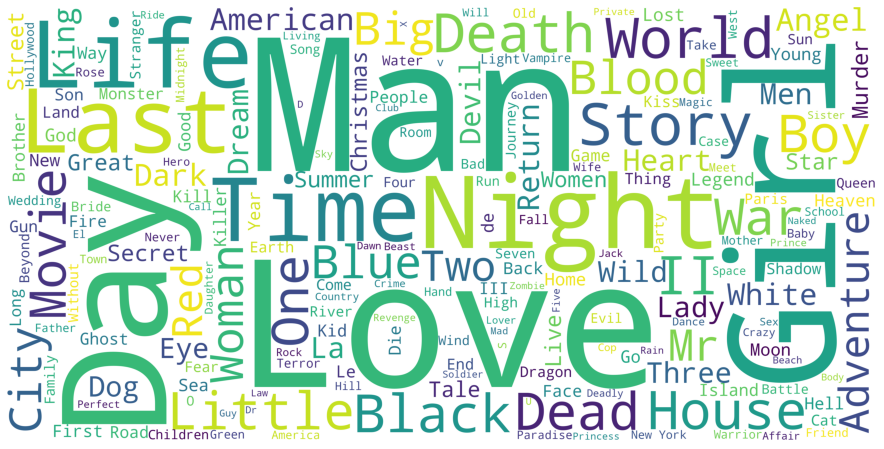

In [11]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

As we can see 'LOVE' the title is common in most of the Movie title followed by 'LIFE','GIRL','MAN' and 'NIGHT'

### Lets see the word cloud for 'Overview' column in Movie dataset

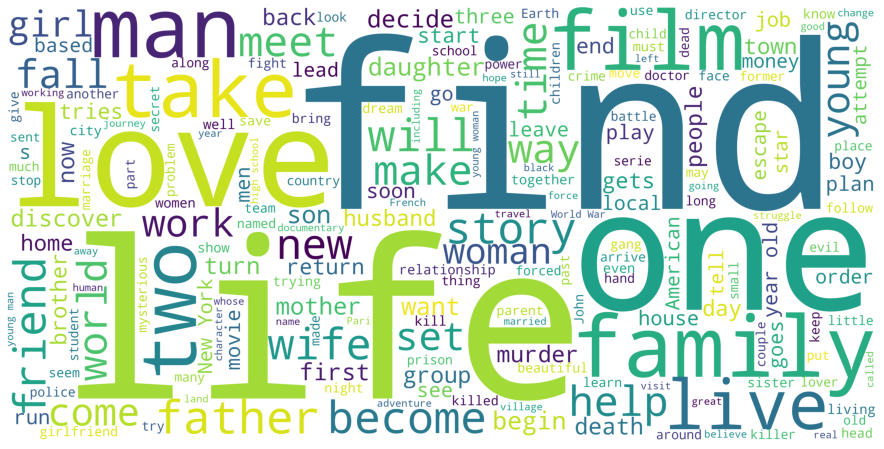

In [12]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

Life is the most commonly used word in Overview,followed by 'one' and 'find' are the most Movie Blurgs.Together with Love, Man and Girl, these wordclouds give us a pretty good idea of the most popular themes present in movies.

### Number of Movies released with respective to countries

In [13]:
con_df = pd.DataFrame(df['production_countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,16907,United States of America
1,1601,United Kingdom
2,1118,France
3,967,Japan
4,806,Italy
5,490,Germany
6,476,Russia
7,457,United Kingdom United States of America
8,402,Canada
9,361,India


In [14]:
con_df.shape

(1552, 2)

Top country in production is "United States of America" followed by United Kingdom and France.1552 country is involved in production,even we can say that 1552 there are unique countries mentioned on dataset

### The language in which the movie was originally shot in.

In [15]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
English,22299,English
French,1680,French
Italian,1243,Italian
Japanese,970,Japanese
German,706,German


Maximum number of language used is English as count 22299 followed by French,Italian

In [16]:
lang_df.shape#It seems that 77 unique languages is involved from the movies

(77, 2)

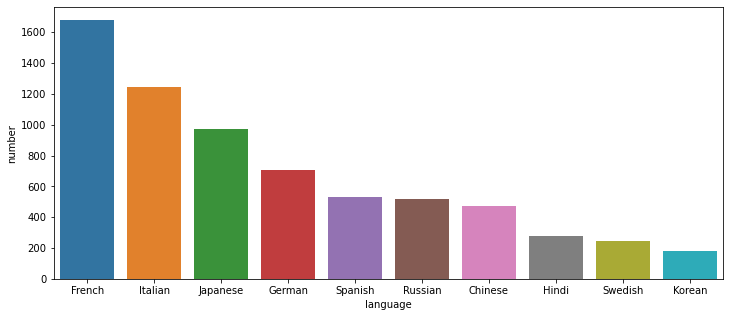

In [19]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

### Inferential based on year vs movie released

In [23]:
year_df = pd.DataFrame(df['release_year'].value_counts())
year_df['year'] = year_df.index
year_df.columns = ['number', 'year']
year_df.head()

,number,year
2006,1252,2006
2005,1130,2005
2007,1040,2007
2004,982,2004
2002,900,2002


we can inference that most of the released movie was on year 2006

In [24]:
year_df.shape

(130, 2)

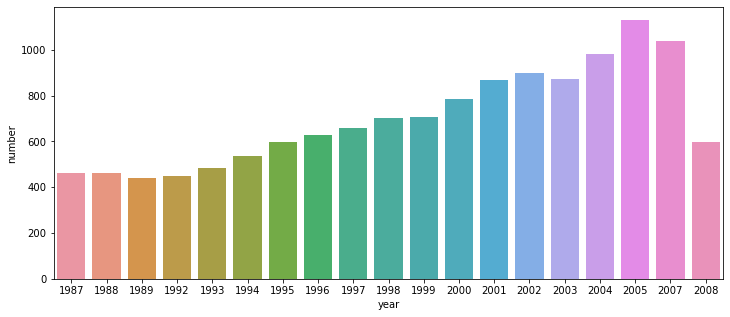

In [25]:
plt.figure(figsize=(12,5))
sns.barplot(x='year', y='number', data=year_df.iloc[1:20])
plt.show()

### Most popular movies by popularity score

In [26]:
df['popularity'].describe()

count    30693.000000
mean         2.747661
std          4.598565
min          0.000000
25%          0.364228
50%          1.047417
75%          3.493310
max        294.337037
Name: popularity, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


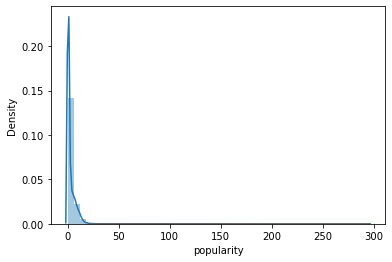

In [27]:
sns.distplot(df['popularity'])
plt.show()

<AxesSubplot:ylabel='Frequency'>

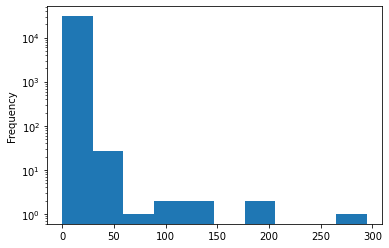

In [28]:
df['popularity'].plot(logy=True, kind='hist')

As the popularity score it seems to be extremely right skewed data with the mean of 2.7 and maximum reaching upto 294 and the 75% percentile is at 3.493 and almost all the data below 75%

In [29]:
df[['title', 'popularity', 'release_year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,release_year
24849,Wonder Woman,294.337037,2017
13089,Deadpool,187.860492,2016
14443,Avatar,185.070892,2009
297,Pulp Fiction,140.950236,1994
12738,The Dark Knight,123.167259,2008
544,Blade Runner,96.272374,1982
16578,The Avengers,89.887648,2012
2902,Fight Club,63.869599,1999
319,The Shawshank Redemption,51.645403,1994
356,Forrest Gump,48.307194,1994


'Wonder Woman' is the most popular movie by the TMDB Popularity Score. 'Deadpool' and 'Avator', two extremely successful movies come in second and third respectively.

### Most Voted on Movies

In [31]:
df['vote_count'].describe()

count    30693.000000
mean        96.352719
std        444.993505
min          0.000000
25%          3.000000
50%          9.000000
75%         30.000000
max      12269.000000
Name: vote_count, dtype: float64

In [32]:
df[['title', 'vote_count', 'release_year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,release_year
12738,The Dark Knight,12269.0,2008
14443,Avatar,12114.0,2009
16578,The Avengers,12000.0,2012
13089,Deadpool,11444.0,2016
19014,Interstellar,11187.0,2014
2902,Fight Club,9678.0,1999
2504,The Matrix,9079.0,1999
12840,Iron Man,8951.0,2008
4963,The Lord of the Rings: The Fellowship of the Ring,8892.0,2001
20118,Jurassic World,8842.0,2015


From the vote_count we can inference that 'Dark Knight' got the first position with the vote_count 12269 ,followed by 'Avator' ,'The Avengers' secured with 2md and 3rd position

In [33]:
df['vote_average'].describe()

count    30693.00000
mean         5.62915
std          1.90286
min          0.00000
25%          5.00000
50%          6.00000
75%          6.80000
max         10.00000
Name: vote_average, dtype: float64

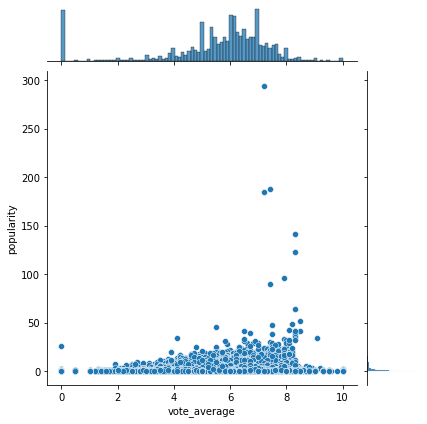

In [37]:
sns.jointplot(x='vote_average', y='popularity', data=df)

#As it is weakly correlated with Vote_average and 'popularity' in which there is no relationship between vote_average and popularity .So,its a independent feature

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_average', ylabel='Density'>

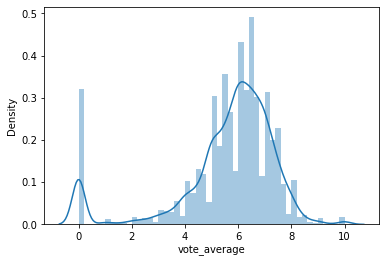

In [34]:
sns.distplot(df['vote_average'])

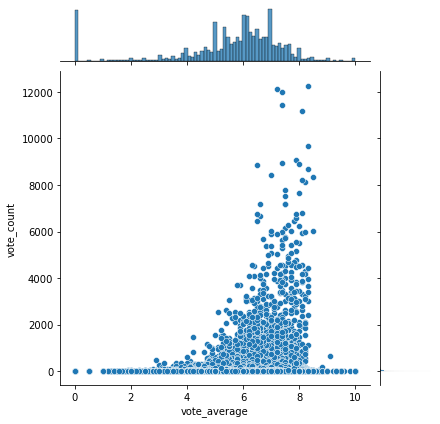

In [30]:
sns.jointplot(x='vote_average', y='vote_count', data=df)

There is a very small correlation between Vote Count and Vote Average. A large number of votes on a particular movie does not necessarily imply that the movie is good.

### Most Critically Acclaimed Movies

In [36]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'release_year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,release_year
844,The Godfather,8.5,6024.0,1972
319,The Shawshank Redemption,8.5,8358.0,1994
1206,Psycho,8.3,2405.0,1960
1208,The Godfather: Part II,8.3,3418.0,1974
5598,Spirited Away,8.3,3968.0,2001
12738,The Dark Knight,8.3,12269.0,2008
2902,Fight Club,8.3,9678.0,1999
530,Schindler's List,8.3,4436.0,1993
297,Pulp Fiction,8.3,8670.0,1994
2253,Life Is Beautiful,8.3,3643.0,1997


The Shawshank Redemption and The Godfather are the two most critically acclaimed movies in the TMDB Database. Interestingly, they are the top 2 movies in IMDB's Top 250 Movies list too. They have a rating of over 9 on IMDB as compared to their 8.5 TMDB Scores.

### Runtime

In [38]:
df['runtime'].describe()

count    30693.000000
mean        99.886358
std         33.199076
min         16.000000
25%         88.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='runtime', ylabel='Density'>

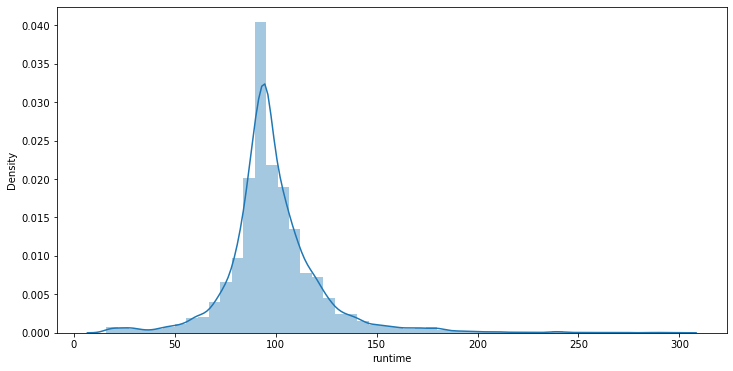

In [39]:
plt.figure(figsize=(12,6))
sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


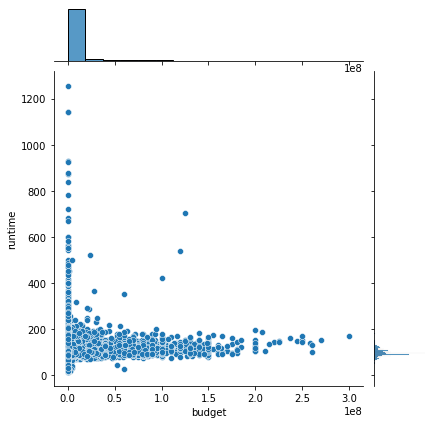

In [40]:
df_mat = df[(df['budget'].notnull()) & (df['runtime'] > 0)]
sns.jointplot('budget', 'runtime', data=df_mat)
plt.show()

As there is weaker correlation between budget and runtime as budget increased still there is no much runtime seen so there is no relation between budget and runtime,but the runtime is normally distributed.

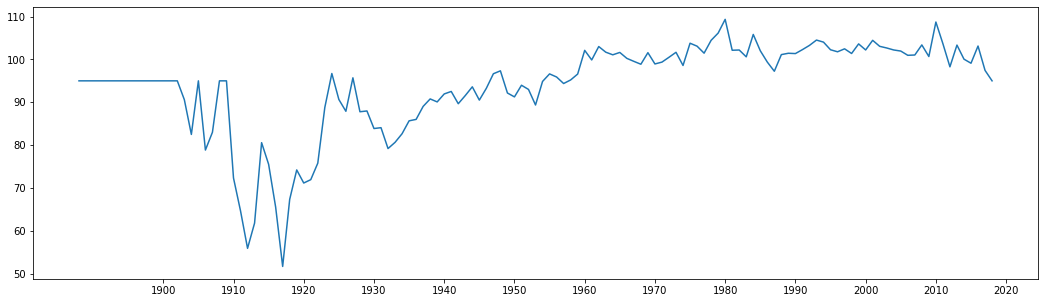

In [45]:
plt.figure(figsize=(18,5))
year_runtime = df[df['release_year']!='NaT'].groupby('release_year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(np.arange(1900, 2024, 10.0))
plt.show()

As we can inference that trends go down on 1917 till 50 min and gain it increse upto 110 almost the ranges lies 90 to 110

###  shortest and longest movie

In [46]:
df[df['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime').head(10)

,runtime,title,release_year
27399,16.0,Instructions for a Light & Sound Machine,2006
27681,16.0,The New York Hat,1912
21779,16.0,Apple Jack,2003
27435,16.0,Noiseman Sound Insect,1997
26240,16.0,Derrick contre Superman,1992
29662,16.0,His Musical Career,1914
26241,16.0,Derrick contre Superman,1992
28846,16.0,Validation,2007
18351,16.0,The Crimson Permanent Assurance,1983
28310,16.0,Rabbit's Moon,1971


From the movie lens the shortest movie is 'Instructions for a Light & Sound Machine' having the runtime as 16.0 followed by'The New York Hat' and 'Apple Jack' .

In [47]:
df[df['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,release_year
19630,1256.0,Centennial,1978
17683,1140.0,Jazz,2001
28869,1140.0,Baseball,1994
13842,931.0,Berlin Alexanderplatz,1980
13992,925.0,Heimat: A Chronicle of Germany,1984
21130,877.0,Taken,2002
17271,874.0,The War,2007
25590,840.0,Seventeen Moments in Spring,1973
30397,780.0,Hollywood,1980
9314,720.0,From the Earth to the Moon,1998


From the movie lens the longest movie is 'Centennial' having the runtime as 1256.0 followed by'Jazz' and 'Baseball' .

### Budget

In [48]:
df['budget'].describe()

count    3.069300e+04
mean     4.132846e+06
std      1.640613e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+08
Name: budget, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget', ylabel='Density'>

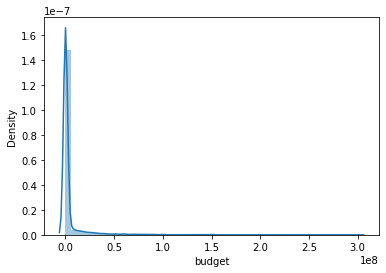

In [49]:
sns.distplot(df['budget'])

<AxesSubplot:ylabel='Frequency'>

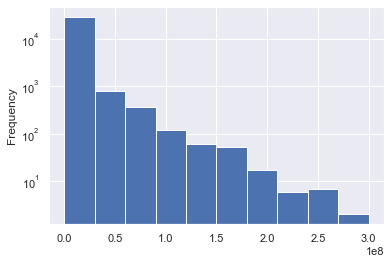

In [60]:
df['budget'].plot(logy=True, kind='hist')

The distribution of movie budgets shows an exponential decay.

# Lets check with most expensive movies

In [51]:
df[df['budget'].notnull()][['title', 'budget', 'revenue', 'release_year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,release_year
12091,Pirates of the Caribbean: At World's End,300000000,9.610000e+08,2007
11313,Superman Returns,270000000,3.910812e+08,2006
17047,John Carter,260000000,2.841391e+08,2012
15498,Tangled,260000000,5.917949e+08,2010
12042,Spider-Man 3,258000000,8.908716e+08,2007
13937,Harry Potter and the Half-Blood Prince,250000000,9.339592e+08,2009
17687,The Hobbit: An Unexpected Journey,250000000,1.021104e+09,2012
15497,Harry Potter and the Deathly Hallows: Part 1,250000000,9.543059e+08,2010
6941,Spectre,245000000,8.806746e+08,2015
14443,Avatar,237000000,2.787965e+09,2009


Two Pirates of the Carribean films occupy the top spots in this list with a staggering budget of over 300 million dollars.

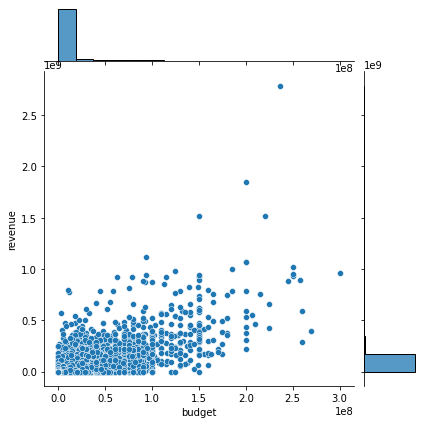

In [52]:
sns.jointplot(x='budget',y='revenue',data=df)

Here from this we can can declare its having a strong correlation

### Revenue 

In [54]:
df['revenue'].describe()

count    3.069300e+04
mean     1.066723e+07
std      5.847861e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

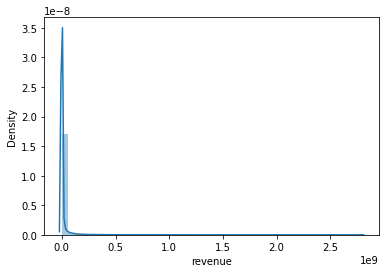

In [55]:
sns.distplot(df[df['revenue'].notnull()]['revenue'])

The distribution of revenue undergoes exponential decay just like budget

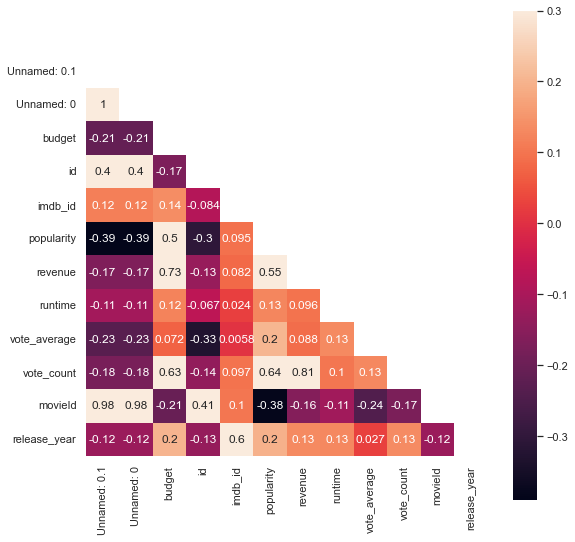

In [58]:
sns.set(font_scale=1)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

In [ ]:
#From the multivariate analysis we can inference that most of the features is highly correlated 